In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from copulas.multivariate import GaussianMultivariate
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from gaussian_multivariate import DataPreProcessor

In [3]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/GM/F_IndianLiverPatient_Synthetic_GM.csv'

## 1. Read data

In [4]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_features = ['gender','class']
for c in categorical_features :
    real_data[c] = real_data[c].astype('category')
data_train = real_data
data_train

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,68,Female,0.6,0.1,1620.0,95.0,127.0,4.6,2.1,0.80,1.0
1,31,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0
2,28,Male,0.8,0.3,190.0,20.0,14.0,4.1,2.4,1.40,1.0
3,60,Male,2.3,0.6,272.0,79.0,51.0,6.6,3.5,1.10,1.0
4,48,Female,0.9,0.2,173.0,26.0,27.0,6.2,3.1,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...
461,75,Female,0.8,0.2,188.0,20.0,29.0,4.4,1.8,0.60,1.0
462,36,Male,5.3,2.3,145.0,32.0,92.0,5.1,2.6,1.00,2.0
463,37,Male,0.7,0.2,235.0,96.0,54.0,9.5,4.9,1.00,1.0
464,17,Female,0.5,0.1,206.0,28.0,21.0,7.1,4.5,1.70,2.0


In [5]:
data_train.dtypes

age           int64
gender     category
TB          float64
DB          float64
alkphos     float64
sgpt        float64
sgot        float64
TP          float64
ALB         float64
A_G         float64
class      category
dtype: object

In [6]:
# data configuration
preprocessor = DataPreProcessor(data_train)
data_train = preprocessor.preprocess_train_data()
data_train

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,gender0,gender1,class0,class1
0,68,0.6,0.1,1620.0,95.0,127.0,4.6,2.1,0.80,0.730957,0.500000,0.730957,0.500000
1,31,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,0.500000,0.730957,0.730957,0.500000
2,28,0.8,0.3,190.0,20.0,14.0,4.1,2.4,1.40,0.500000,0.730957,0.730957,0.500000
3,60,2.3,0.6,272.0,79.0,51.0,6.6,3.5,1.10,0.500000,0.730957,0.730957,0.500000
4,48,0.9,0.2,173.0,26.0,27.0,6.2,3.1,1.00,0.730957,0.500000,0.730957,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,75,0.8,0.2,188.0,20.0,29.0,4.4,1.8,0.60,0.730957,0.500000,0.730957,0.500000
462,36,5.3,2.3,145.0,32.0,92.0,5.1,2.6,1.00,0.500000,0.730957,0.500000,0.730957
463,37,0.7,0.2,235.0,96.0,54.0,9.5,4.9,1.00,0.500000,0.730957,0.730957,0.500000
464,17,0.5,0.1,206.0,28.0,21.0,7.1,4.5,1.70,0.730957,0.500000,0.500000,0.730957


## 2. Train the model and generate data

In [7]:
gm = GaussianMultivariate()
gm.fit(data_train)

In [8]:
generated_samples = gm.sample(len(data_train))
generated_samples

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,gender0,gender1,class0,class1
0,68.506558,0.792221,0.210326,403.231073,41.466674,33.224376,5.532269,2.299157,0.739703,0.481491,0.749438,0.751260,0.479674
1,62.326065,1.081347,0.299965,432.280680,29.344795,45.448756,6.762787,3.424076,1.132054,0.766712,0.464241,0.658480,0.572038
2,66.093060,1.106183,0.228158,409.387072,182.941301,74.747186,7.259657,4.059811,0.881810,0.460409,0.770534,0.709375,0.521555
3,18.161850,0.319369,0.211002,123.339810,33.420530,39.358963,8.525534,4.605769,1.557012,0.461893,0.769061,0.505988,0.724949
4,28.205501,0.689095,0.791855,41.390511,37.560963,49.239559,7.501857,3.313626,0.706537,0.519759,0.711203,0.564898,0.666117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,44.421919,0.555285,0.120601,200.579550,18.119024,20.245458,7.024714,2.973412,0.638638,0.524155,0.706792,0.705496,0.525474
462,45.683636,0.441402,0.276043,176.890784,40.251383,37.730839,5.729123,3.276946,1.346909,0.485464,0.745512,0.514132,0.716807
463,23.024692,1.294539,0.289846,224.054337,38.982170,123.888386,7.224159,3.751692,0.944799,0.495493,0.735482,0.528818,0.702182
464,56.576739,0.516323,0.512852,307.627940,30.908007,44.850122,5.357072,2.377225,0.284098,0.489680,0.741270,0.734660,0.496305


## 3. Transform Generated Data

In [9]:
synthetic_data = preprocessor.transform_data(generated_samples)
synthetic_data

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,68,Male,0.792221,0.210326,403.231073,41.466674,33.224376,5.532269,2.299157,0.739703,1.0
1,62,Female,1.081347,0.299965,432.280680,29.344795,45.448756,6.762787,3.424076,1.132054,1.0
2,66,Male,1.106183,0.228158,409.387072,182.941301,74.747186,7.259657,4.059811,0.881810,1.0
3,18,Male,0.319369,0.211002,123.339810,33.420530,39.358963,8.525534,4.605769,1.557012,2.0
4,28,Male,0.689095,0.791855,41.390511,37.560963,49.239559,7.501857,3.313626,0.706537,2.0
...,...,...,...,...,...,...,...,...,...,...,...
461,44,Male,0.555285,0.120601,200.579550,18.119024,20.245458,7.024714,2.973412,0.638638,1.0
462,45,Male,0.441402,0.276043,176.890784,40.251383,37.730839,5.729123,3.276946,1.346909,2.0
463,23,Male,1.294539,0.289846,224.054337,38.982170,123.888386,7.224159,3.751692,0.944799,2.0
464,56,Male,0.516323,0.512852,307.627940,30.908007,44.850122,5.357072,2.377225,0.284098,1.0


In [10]:
real_data.describe()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,44.212446,3.318455,1.472532,289.995708,84.251073,116.491416,6.503004,3.160300,-428.230429
std,15.650069,6.335770,2.774472,245.212815,196.869782,314.013021,1.087422,0.793272,6544.232426
min,4.000000,0.400000,0.100000,63.000000,10.000000,11.000000,2.700000,0.900000,-100000.000000
25%,32.250000,0.800000,0.200000,174.000000,24.000000,26.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,206.000000,36.000000,43.000000,6.600000,3.100000,0.980000
75%,56.000000,2.675000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [11]:
synthetic_data.describe()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.00000
mean,43.914163,2.500103,1.338787,235.054086,51.471548,79.349665,6.543387,3.191811,0.981194,1.28970
std,16.272450,13.931491,4.276378,144.644167,65.662018,206.963426,1.163628,0.849059,0.630912,0.45411
min,-2.000000,0.011970,0.100949,24.139576,0.675264,0.248432,2.200241,0.658985,-3.005885,1.00000
25%,32.000000,0.590819,0.198083,157.642535,22.357467,24.971264,5.735589,2.629044,0.789165,1.00000
50%,43.000000,0.996307,0.328949,203.273890,34.512243,41.097885,6.631343,3.228509,0.959714,1.00000
75%,57.000000,1.596411,0.633834,272.113455,55.592025,67.857318,7.259615,3.786385,1.109338,2.00000
max,82.000000,269.379776,47.148921,1392.915963,776.069262,3483.955988,10.018638,6.050549,5.717952,2.00000


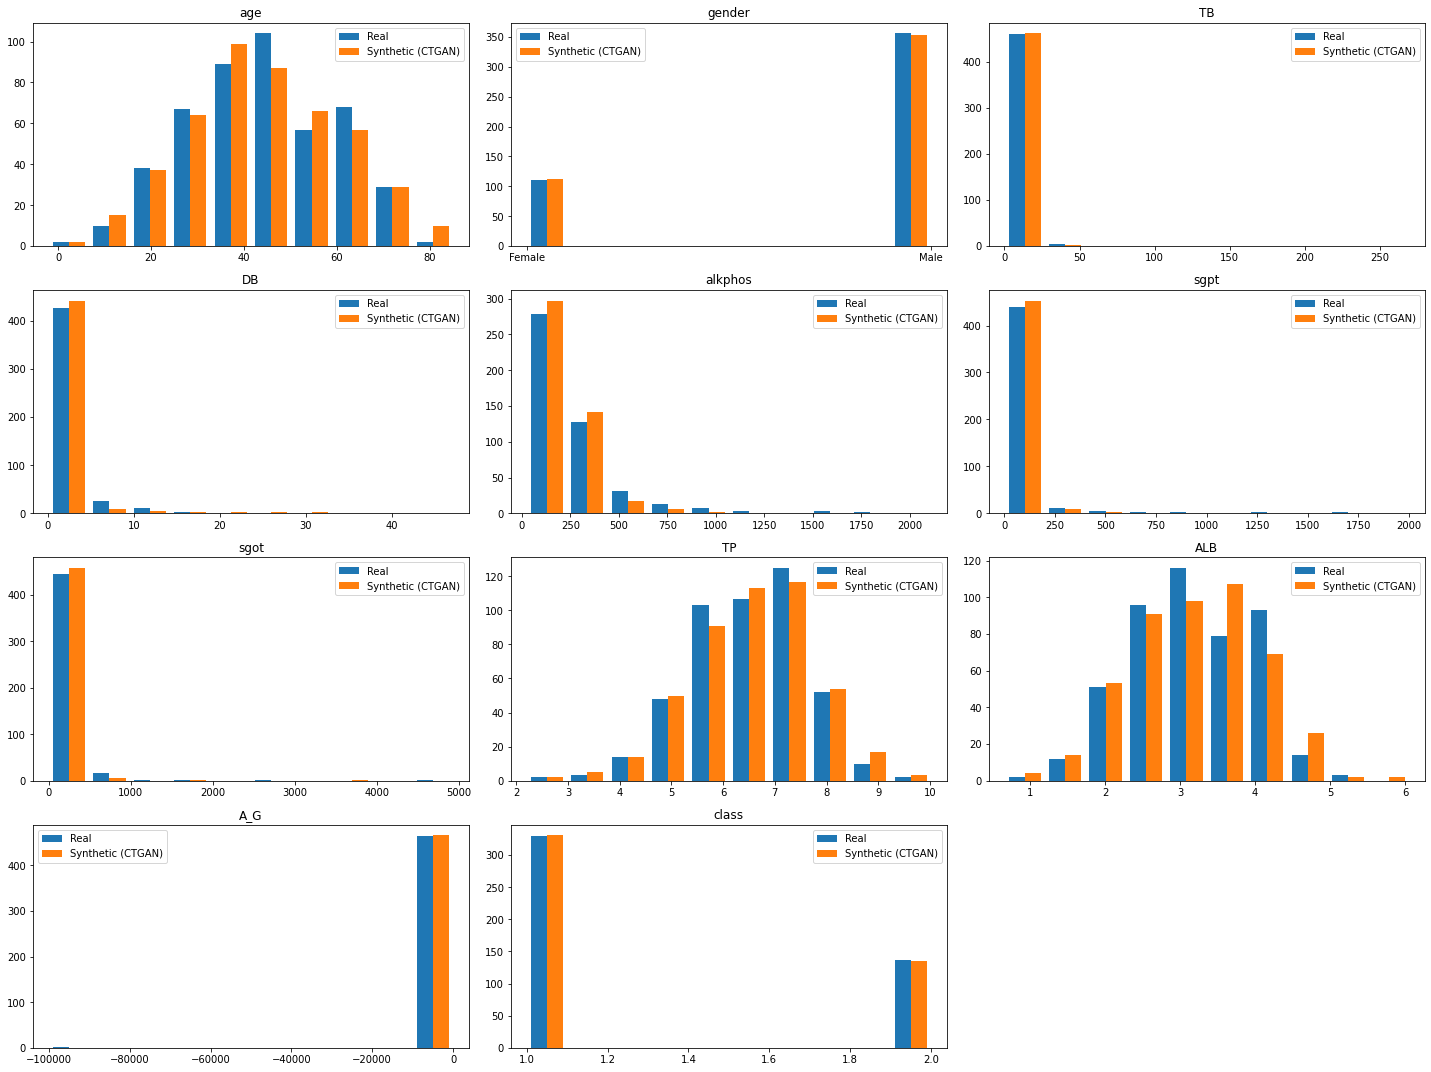

In [12]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (CTGAN)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[3,2])
fig.tight_layout(pad=1.1)

In [13]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)